In [12]:
# Importando bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objs as go
from statsmodels.tsa.seasonal import seasonal_decompose

In [13]:
# Carregamento de dados
try:
    df = pd.read_csv('data/arquivo.csv')
    print("Dados carregados com sucesso!")
except Exception as e:
    print(f"Erro ao carregar o arquivo: {e}")
    df = pd.DataFrame()

Dados carregados com sucesso!


In [14]:
# Exibir as primeiras linhas do conjunto de dados
print("Primeiras linhas do conjunto de dados:")
print(df.head())

# Exibir informações básicas do conjunto de dados
print("\nInformações básicas do conjunto de dados:")
print(df.info())

Primeiras linhas do conjunto de dados:


   ID                                  Nome do Curso  Quantidade de Vendas  \
0   1             Introdução à Programação em Python                    50   
1   2             Desenvolvimento Web com HTML e CSS                    30   
2   3  JavaScript Avançado: Frameworks e Bibliotecas                    20   
3   4                 Introdução ao Machine Learning                    15   
4   5        Desenvolvimento Mobile com React Native                    25   

   Preço Unitário        Data  
0            39.9  2023-01-01  
1            59.9  2023-01-02  
2            79.9  2023-01-03  
3            99.9  2023-01-04  
4            69.9  2023-01-05  

Informações básicas do conjunto de dados:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   ID                    25 non-null     int64  
 1   Nome do Curso         25 non-null   

In [15]:
# Estatísticas descritivas para colunas numéricas
print("\nEstatísticas descritivas para colunas numéricas:")
print(df.describe())


Estatísticas descritivas para colunas numéricas:
              ID  Quantidade de Vendas  Preço Unitário
count  25.000000             25.000000       25.000000
mean   13.000000             17.960000       83.900000
std     7.359801             10.921996       21.984843
min     1.000000              5.000000       39.900000
25%     7.000000             10.000000       69.900000
50%    13.000000             15.000000       79.900000
75%    19.000000             20.000000       99.900000
max    25.000000             50.000000      119.900000


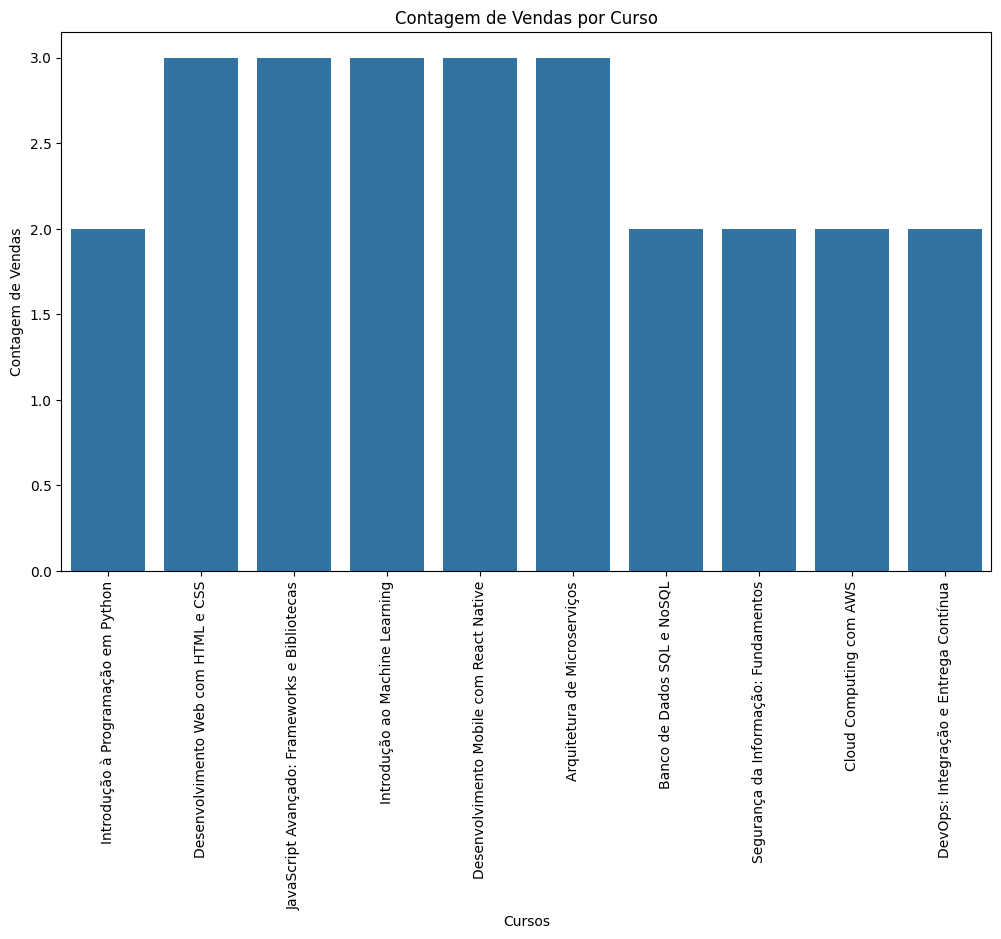

In [16]:
# Gráfico de barras para contagem de categorias
plt.figure(figsize=(12, 7))
sns.countplot(data=df, x='Nome do Curso')
plt.xticks(rotation=90)
plt.title('Contagem de Vendas por Curso')
plt.xlabel('Cursos')
plt.ylabel('Contagem de Vendas')
plt.show()


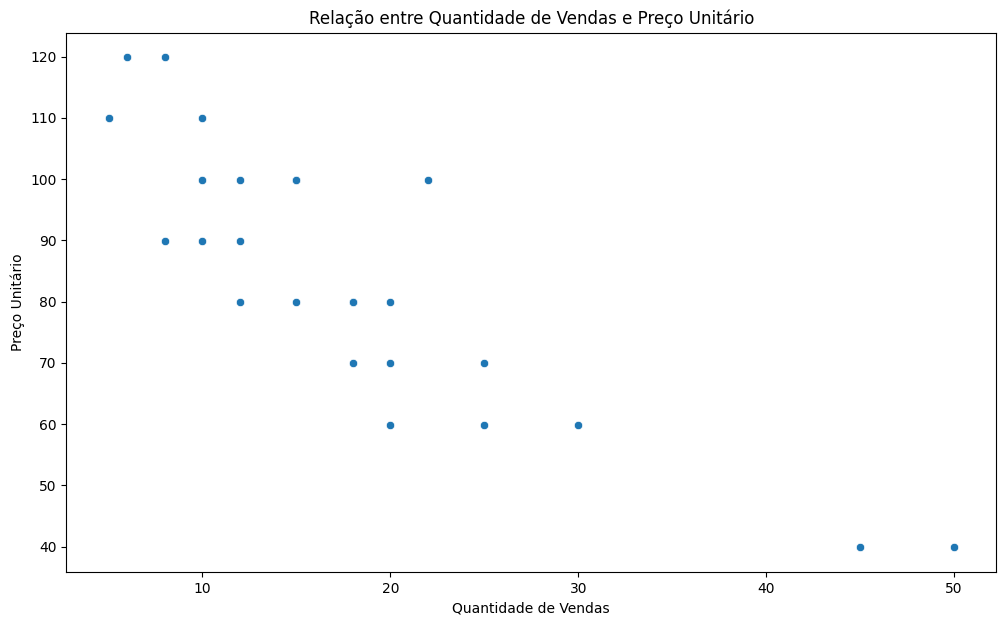

In [17]:
# Gráfico de dispersão para relação entre Quantidade de Vendas e Preço Unitário
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df, x='Quantidade de Vendas', y='Preço Unitário')
plt.title('Relação entre Quantidade de Vendas e Preço Unitário')
plt.xlabel('Quantidade de Vendas')
plt.ylabel('Preço Unitário')
plt.show()

In [18]:
# Calcular a receita total gerada pela venda dos cursos
receita_total = (df['Quantidade de Vendas'] * df['Preço Unitário']).sum()
print(f"Receita total gerada pela venda dos cursos: R$ {receita_total:.2f}")

Receita total gerada pela venda dos cursos: R$ 32735.10


In [19]:
# Curso com o maior número de vendas
mais_vendido = df.loc[df['Quantidade de Vendas'].idxmax()]
print(f"\nCurso com o maior número de vendas:\n{mais_vendido}")


Curso com o maior número de vendas:
ID                                                       1
Nome do Curso           Introdução à Programação em Python
Quantidade de Vendas                                    50
Preço Unitário                                        39.9
Data                                            2023-01-01
Name: 0, dtype: object


In [20]:
df['Data'] = pd.to_datetime(df['Data'])

In [21]:
fig = go.Figure()

fig.add_trace(go.Scatter(x=df['Data'], y=df['Quantidade de Vendas'], mode='lines+markers', name='Vendas'))

fig.update_layout(
  title='Distribuição das Vendas ao Longo do Tempo',
  xaxis_title='Data',
  yaxis_title='Quantidade de Vendas',
  xaxis=dict(type='date'),
  )

fig.show()

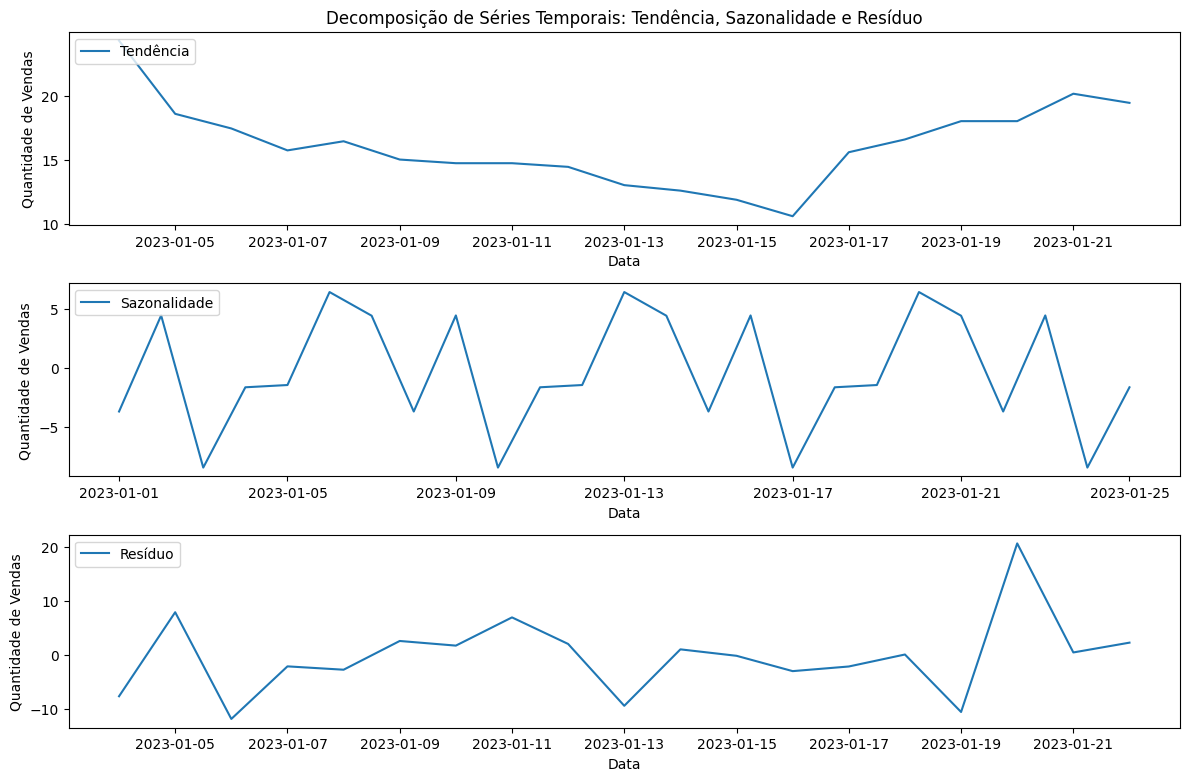

In [22]:
decomposition = seasonal_decompose(df.set_index('Data')['Quantidade de Vendas'], model='additive')

plt.figure(figsize=(12, 10))
plt.subplot(411)
plt.plot(decomposition.trend, label='Tendência')
plt.legend(loc='upper left')
plt.title('Decomposição de Séries Temporais: Tendência, Sazonalidade e Resíduo')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')

plt.subplot(412)
plt.plot(decomposition.seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')

plt.subplot(413)
plt.plot(decomposition.resid, label='Resíduo')
plt.legend(loc='upper left')
plt.xlabel('Data')
plt.ylabel('Quantidade de Vendas')

plt.tight_layout()
plt.show()